In [117]:
%reset -f

In [1]:
import random
import math
import handcalcs.render
import numpy as np
import sympy as sp
from sympy import Symbol, Integer, Integral, Float
import matplotlib.pyplot as plt
PD = 184
import scipy.stats as stats
from scipy import integrate
%matplotlib inline

In [2]:
class data:
    def __init__(self, _X, _Y, _color='tab:orange'):
        self.X = _X; self.Y = _Y; self.color = _color
def prePlot():
    fig = plt.figure(dpi=PD)
def plotHist(item):
    plt.twinx().hist(item.X, item.Y, color=item.color)
def plotLine(item):
    plt.plot(item.X, item.Y, linestyle='solid', marker='None', color=item.color)
def plotPoint(item):
    plt.plot(item.X, item.Y, linestyle='none', marker='.', color=item.color)
def plotPixel(item):
    plt.plot(item.X, item.Y, linestyle='none', marker=',', color=item.color)
def plotAxisLabels(xl, yl):
    plt.xlabel(xl); plt.ylabel(yl)
def postPlot(scale=True):
    if scale == True:
        plt.axis('scaled')
    print(plt.figure())
    plt.figure().clear()

Figure(640x480)


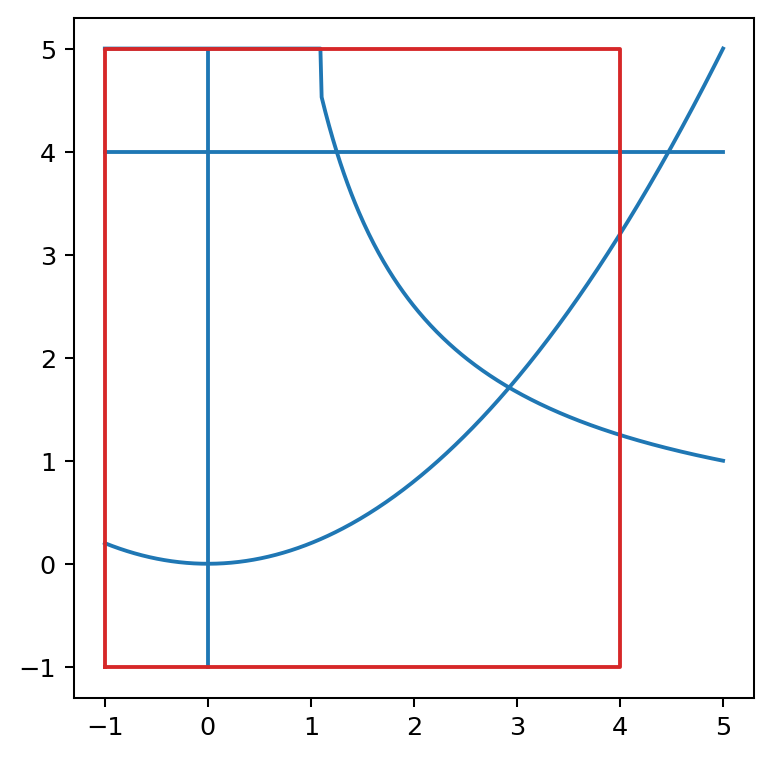

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [120]:
n = 500
x_from = -1
x_to = 4
y_from = -1
y_to = 5
_x = np.linspace(x_from, y_to, n)
_y = np.linspace(y_from, y_to, n)

f_1 = lambda x: 0.2*(x**2)
f_2 = lambda x: (1 / (0.2 * x))

x_1 = _x
y_1 = [f_1(x) for x in _x]

x_2 = _x
y_2 = [(f_2(x) if (x > 1.1) else y_to) for x in _x]

x_3 = [0 for _ in _x]
y_3 = _y

x_4 = _x
y_4 = [4 for _ in _x]

x_square = [x_from, x_from, x_to, x_to, x_from]
y_square = [y_from, y_to, y_to, y_from, y_from]

prePlot()
plotLine(data(x_1, y_1,'tab:blue'))
plotLine(data(x_2, y_2,'tab:blue'))
plotLine(data(x_3, y_3,'tab:blue'))
plotLine(data(x_4, y_4,'tab:blue'))
plotLine(data(x_square, y_square,'tab:red'))
postPlot()

Figure(640x480)


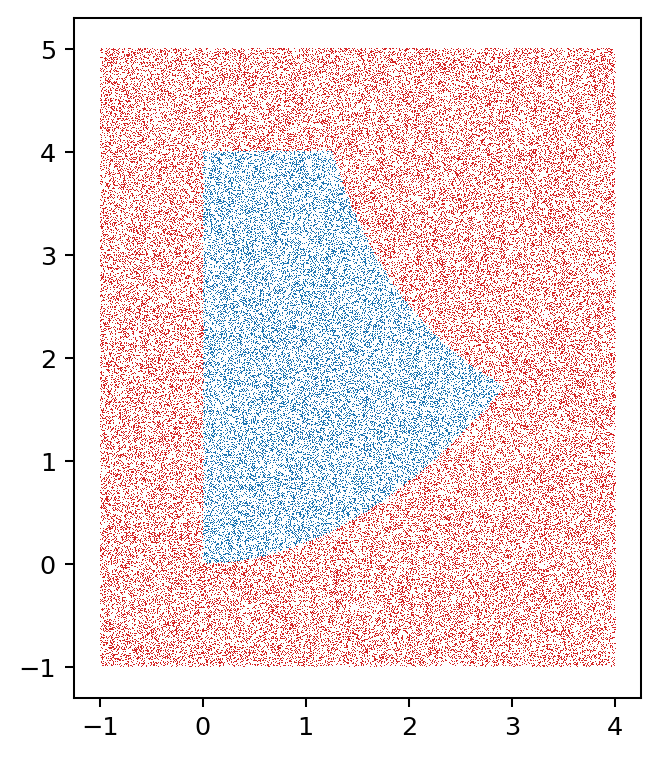

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [121]:
N = 100000

inside = [[], []]
outside = [[], []]
for i in range(N):
    x = random.uniform(x_from, x_to)
    y = random.uniform(y_from, y_to)
    if x>0 and y<4 and f_1(x)<y and f_2(x)>y:
        inside[0].append(x)
        inside[1].append(y)
    else:
        outside[0].append(x)
        outside[1].append(y)

prePlot()
plotPixel(data(inside[0], inside[1],'tab:blue'))
plotPixel(data(outside[0], outside[1],'tab:red'))
postPlot()

In [122]:
%%render # Short
inside_count = len(inside[0])
outside_count = len(outside[0])
S_square = (x_to-x_from) * (y_to-y_from)
S_estimation = S_square * inside_count / N

<IPython.core.display.Latex object>

In [142]:
#symbolsToDelete = ('x', 'y')
#for z0 in symbolsToDelete:
#    del globals()[z0]
integral = Integral(
    (Symbol('4')-(Symbol('0.2')*(Symbol('X')**Symbol('2')))), 
    (Symbol('x'), Symbol('0'), Symbol('1.25'), Symbol('3'))) + Integral(
    (Symbol('1') / (Symbol('0.2') * Symbol('X'))) - (Symbol('0.2')*(Symbol('X')**Symbol('2'))), 
    (Symbol('x'), Symbol('1.25'), sp.root(Symbol('25'), Symbol('3'))))
integral

Integral(-0.2*X**2 + 4, (x, 0, 1.25)) + Integral(-0.2*X**2 + 1/(0.2*X), (x, 1.25, 25**(1/3)))

In [150]:
integral1 = integrate.quad(lambda x: 4 - 0.2*x**2, 0, 1.25)[0]
integral2 = integrate.quad(lambda x: 1/(0.2*x)-(0.2*x**2), 1.25, sp.root(25, 3))[0]
integral1 + integral2

7.582408618209287